In [2]:
# All the dependencies 
import pandas as pd 
import textblob
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob
import nltk
import numpy as np
from wordcloud import WordCloud

# Cloud  needs a restructure(redudancy,efficency), this iteration was to start with the Analysis work 

In [3]:
# Create a Data Frame from the CSV
dff = pd.read_csv('/Users/virajdattkohir/Downloads/Amazon_Dataset/amazonReviews.csv')

In [4]:
# Use text blob to get sentiments,polarity (should improve on this)
dff['polarity'] = dff.apply(lambda x: TextBlob(x['Review-Text']).sentiment.polarity, axis=1)

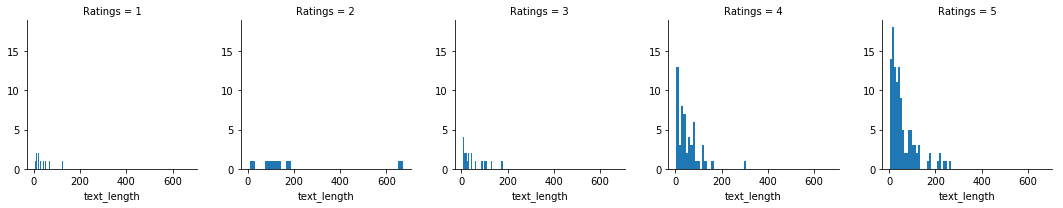

In [31]:
# Visulatization of the no of reviews grouped by Stars
dff['text_length'] = dff['Review-Text'].apply(len)
g = sns.FacetGrid(data=dff, col = "Ratings")
g.map(plt.hist,'text_length',bins=30)
plt.show()

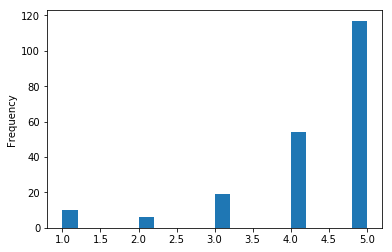

In [32]:
# 
dff['Ratings'].plot.hist(bins=20)
plt.show()

In [5]:
# Using the polaruty to assess the comments sentiment(+ve or -ve)
print("The number of positive comments are ",len(dff[dff["polarity"]>0.15]))
print("The number of negative comments are",len(dff[dff["polarity"]<0.15]))
meanPolarity = dff['polarity'].mean()
if meanPolarity > 0.15:
    print("Positive Product")
else:
    print("Negative Product")

The number of positive comments are  169
The number of negative comments are 36
Positive Product


In [6]:
# Intantiate a set of stop words( stop words, includes words like is, a, an, the)
stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# Print the stop words
print(RE_stopwords)
# remove the stop words 
words = (dff["Review-Text"].str.lower().replace([r'\|', RE_stopwords], [' ', ''], regex=True).str.cat(sep=' ').split())
# Remove the puntications
words = [''.join(c for c in s if c not in string.punctuation) for s in words]
col = ["coll"]
# Create a data frame from the words in Review-Text(excluding stop words and punctuations)
pdd = pd.DataFrame(words,columns=col)
# This is to remove the space charecters, induced when we replace the stop words with ''.
# First we fill the space characters('') with nan and then drop those rows
pdd['coll'].replace('', np.nan, inplace=True)
pdd.dropna(subset=['coll'], inplace = True)

\b(?:i|me|my|myself|we|our|ours|ourselves|you|you're|you've|you'll|you'd|your|yours|yourself|yourselves|he|him|his|himself|she|she's|her|hers|herself|it|it's|its|itself|they|them|their|theirs|themselves|what|which|who|whom|this|that|that'll|these|those|am|is|are|was|were|be|been|being|have|has|had|having|do|does|did|doing|a|an|the|and|but|if|or|because|as|until|while|of|at|by|for|with|about|against|between|into|through|during|before|after|above|below|to|from|up|down|in|out|on|off|over|under|again|further|then|once|here|there|when|where|why|how|all|any|both|each|few|more|most|other|some|such|no|nor|not|only|own|same|so|than|too|very|s|t|can|will|just|don|don't|should|should've|now|d|ll|m|o|re|ve|y|ain|aren|aren't|couldn|couldn't|didn|didn't|doesn|doesn't|hadn|hadn't|hasn|hasn't|haven|haven't|isn|isn't|ma|mightn|mightn't|mustn|mustn't|needn|needn't|shan|shan't|shouldn|shouldn't|wasn|wasn't|weren|weren't|won|won't|wouldn|wouldn't)\b


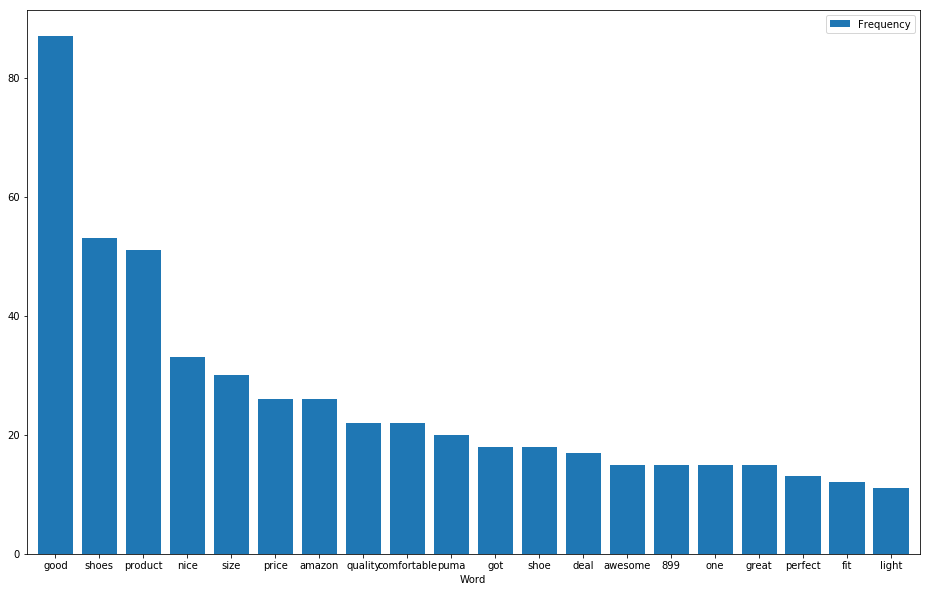

In [7]:
#Counter counts the number of words along with its frequency. We use most_common method to include the top 20 
#words used across all the reviews for the product
rslt = pd.DataFrame(Counter(pdd["coll"]).most_common(20),columns=['Word', 'Frequency']).set_index('Word')
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)
plt.show()

In [8]:
print("The least occuring words are :")
for word, count in Counter(words).most_common()[-20:]:
    print ('%s %s' % (word, count))

The least occuring words are :
blueish 1
part 1
plasticky 1
simply 1
awesomereturning 1
avg 1
couldnt 1
knockoff 1
tnx 1
wondefull 1
xcellent 1
fot 1
lite 1
ontime 1
need 1
navy 1
colour 1
could 1
around 1
ankles 1


The MOST used WORDS:


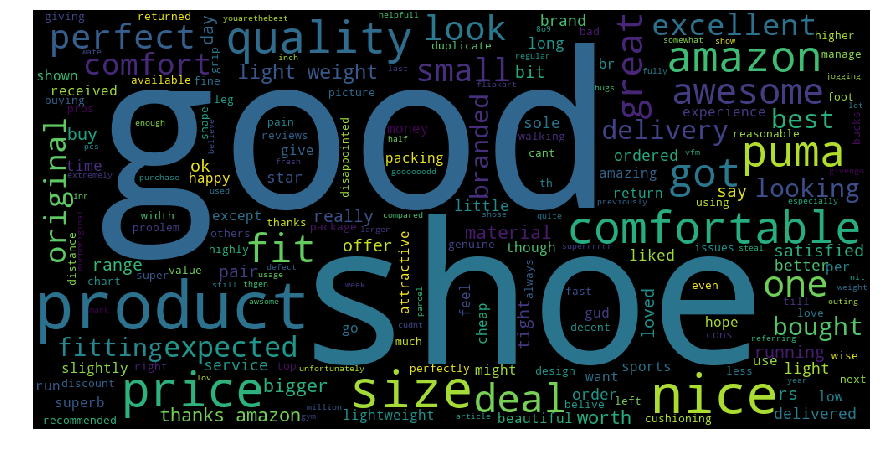

In [27]:
#Building the word cloud for MOST used WORDS
print("The MOST used WORDS:")
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(pdd['coll']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
# Create a Data frame for the least used words
least_used = Counter(pdd["coll"]).most_common()[-50:] # Returns the least used words (50 in this case)
cols = ['Word', 'Frequency']
least_pd = pd.DataFrame(least_used,columns=cols)

The LEAST used WORDS :


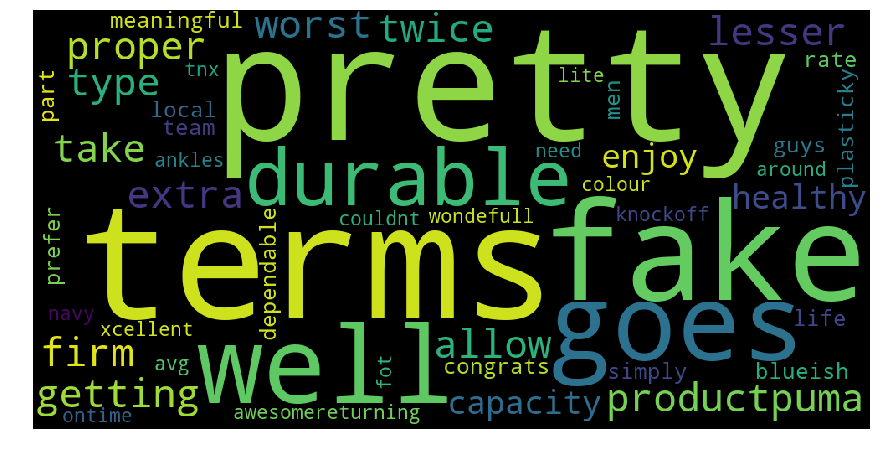

In [28]:
# Build the word cloud for the least used words
print("The LEAST used WORDS :")
leastwordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(least_pd['Word']))
plt.figure(figsize=(15,8))
plt.imshow(leastwordcloud)
plt.axis("off")
plt.show()